# 直方图均衡化

In [91]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

读取图片，其读取的照片如下图所示。

(-0.5, 1199.5, 899.5, -0.5)

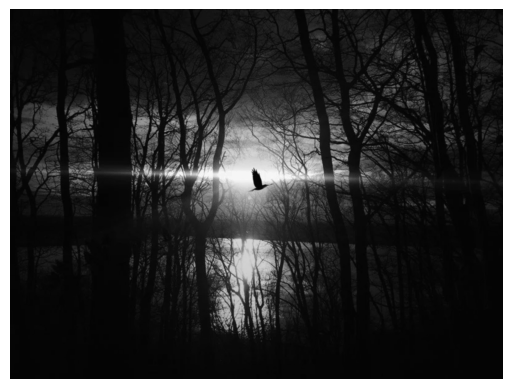

In [92]:
image = cv2.imread('./images/dark.png')    #打开照片               
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)              #建立一个灰度图像
gray = image.copy()                                          #建立一个拷贝图像
plt.imshow(gray,cmap='gray')
plt.axis('off')

读取图片以后，还需要对所有像素点的取值做一个采集，需要统计每个颜色出现的概率是多少。

In [93]:
[height, width] = [image.shape[0], image.shape[1]]  # 提取出高度信息与宽度信息
count = np.zeros(256)  

# 统计像素个数并计算概率
for i in range(height):
    for j in range(width):                                   #遍历所有像素点
        depth = image[i, j]
        count[depth] = count[depth] + 1
        
total = height * width                                       #总像素个数
count = count / total                                        #计算概率(此时的count代表的是像素出现的概率)
count_before = count.copy()                                  #为之后画出直方图做准备


这里是直方图均衡化十分关键的一步，在程序中，我们根据每个颜色统计的概率，做出映射表。

In [97]:
# 计算累计概率
sum = float(0)  # 此时的sum是一个浮点型数组
for i in range(256):
    sum += count[i]
    count[i] = sum

# 计算映射表
mapl = np.uint8(255 * count)


根据映射表，对图像的每一个像素进行映射处理操作。

In [95]:
# 将图像进行映射
for i in range(height):
    for j in range(width):  # 遍历每一个图像
        depth = image[i, j]
        gray[i, j] = mapl[depth]  # 按照映射表计算映射后的图像

# 统计像素个数并计算概率
for i in range(height):
    for j in range(width):
        depth = gray[i, j]
        count[depth] = count[depth] + 1  # 计算每一个灰度等级的个数


画图

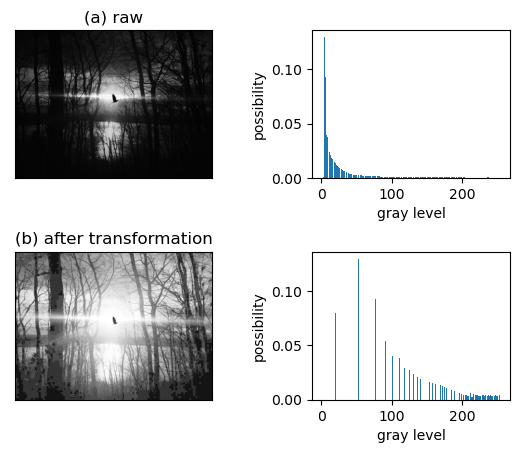

In [96]:
# 画图
x = np.arange(256)  # 设置x轴坐标
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.5, hspace=0.5)

titles = ['(a) raw', '(b) after transformation']  # 设置图像标题
images = [image, gray]  # 设置图像
for i in range(2):
    plt.subplot(2, 2, 2*i+1), plt.imshow(images[i], cmap='gray')  # 设置区域并画图
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2)
plt.bar(x, count_before)
plt.xlabel('gray level')
plt.ylabel('possibility')

plt.subplot(2, 2, 4)
plt.bar(x, count / total)  # 概率 = 像素个数 / 总个数
plt.xlabel('gray level')
plt.ylabel('possibility')

plt.show()
